Index(['San Francisco, CA', 'New York, NY', 'Washington, DC', 'Boston, MA',
       'Chicago, IL', 'Herndon, VA', 'Cambridge, MA', 'McLean, VA',
       'Chantilly, VA', 'United States'],
      dtype='object', name='Location')
Location
Washington, DC       139.500000
New York, NY         136.680000
Herndon, VA          134.642857
McLean, VA           126.291667
Chantilly, VA        124.181818
Boston, MA           122.583333
Chicago, IL          121.318182
Cambridge, MA        120.666667
United States        120.227273
San Francisco, CA    119.224638
Name: Avg Salary, dtype: float64


C:\Users\samir\AppData\Local\Temp\ipykernel_6772\3840352842.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_location.values, y=avg_salary_by_location.index, palette='viridis')


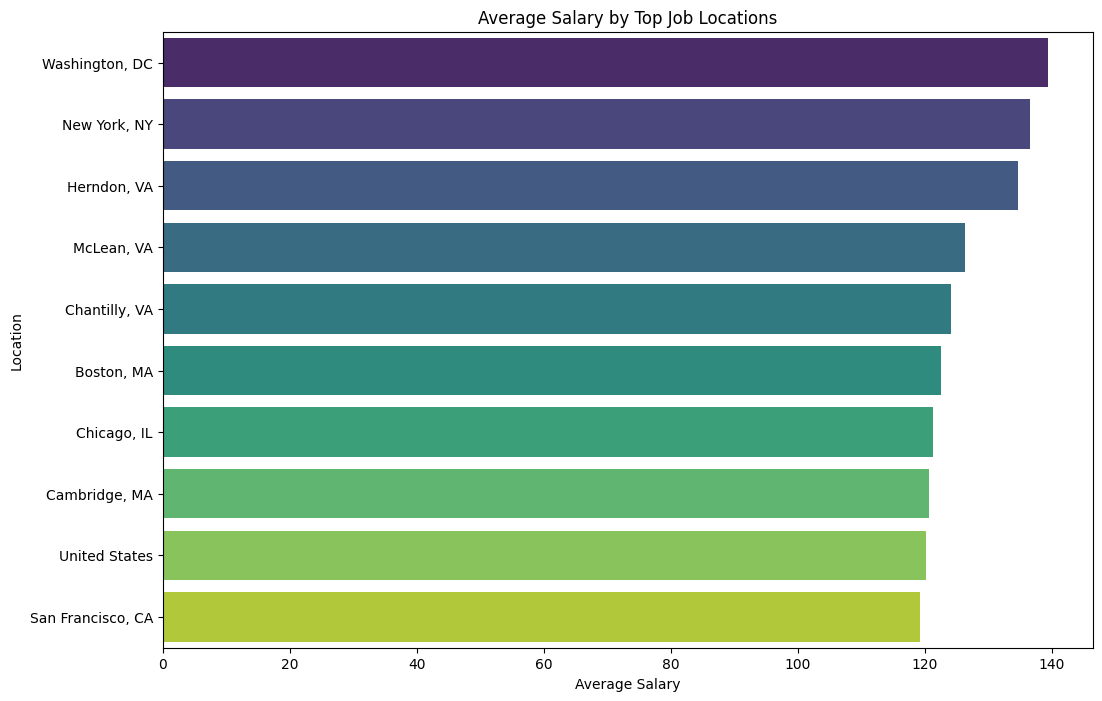

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('./Uncleaned_DS_jobs/Uncleaned_DS_jobs.csv')

# Drop rows with missing values
data = data.dropna()

# Extracting numerical salary from 'Salary Estimate'
data = data[data['Salary Estimate'] != '-1']  # Remove rows with '-1' as salary estimate
data['Min Salary'] = data['Salary Estimate'].apply(lambda x: int(x.split('-')[0].replace('K','').replace('$','').replace(' ','')))
data['Max Salary'] = data['Salary Estimate'].apply(lambda x: int(x.split('-')[1].split('(')[0].replace('K','').replace('$','').replace(' ','')))
data['Avg Salary'] = (data['Min Salary'] + data['Max Salary']) / 2

# Find the most frequent job locations
top_locations = data['Location'].value_counts().head(10).index
print(top_locations)

# Filter the dataset to include only the top locations
top_locations_data = data[data['Location'].isin(top_locations)]

# Group by location and calculate average salary
avg_salary_by_location = top_locations_data.groupby('Location')['Avg Salary'].mean().sort_values(ascending=False)
print(avg_salary_by_location)

# Plot the average salary for the top locations
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_salary_by_location.values, y=avg_salary_by_location.index, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Location')
plt.title('Average Salary by Top Job Locations')
plt.show()
